# Import

In [2]:
# %matplotlib widget
%matplotlib inline

#enable autoreloading of all modules once changed
# %load_ext autoreload
# %autoreload 2
import sys
import os
sys.path.append("..")



from datetime import datetime
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
import warnings
import fnmatch
import json
import copy
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import time

from scipy.special import softmax
# np.random.seed(1)

# np.seterr(divide='ignore', invalid='ignore')


from _context import *
from src.rl import ActorCriticWaterMaze
from src.environments import WaterMaze
from tqdm import tqdm
from _context import *
from src.plotting import *
# from src.rl import ActorCritic
# from src.environments import TMaze
from src.memristor import *
# from scripts.memristor_watermaze_multiprocessing import *

import numpy as np
import matplotlib.pyplot as plt


def moving_average(x, window_size):
    # Calculate the number of elements to pad on each side
    pad_size = window_size // 2
    
    # Pad the input signal symmetrically
    x = np.pad(x, pad_size, mode='symmetric')

    return np.convolve(x, np.ones(window_size), 'valid') / window_size


def render(env, ax,draw_rbf=False,position=[0,0],cmap=plt.cm.get_cmap("Blues")):
        
        # ax = plt.gca()
        ax.axis('off')

        # Plot objective
        ax.add_patch(plt.Circle((0, 0), 0.5, color="red"))
        # Plot U shape
        ax.add_patch(plt.Rectangle((-2.5, -2.5), 1, 4.5, color="gray"))
        ax.add_patch(plt.Rectangle((1.5, -2.5), 1, 4.5, color="gray"))
        ax.add_patch(plt.Rectangle((-1.5, -2.5), 3, 1, color="gray"))

        norm_gauss = 1/(env.st_dev*np.sqrt(2*np.pi))
        halfway_x = env.st_dev*np.sqrt(2*np.log(2))

        rbf_1std = env.st_dev
        # Plot points
        for x in env.x_pos[:env.n_points]:
            for y in env.x_pos[:env.n_points]:
        # for x in env.x_pos:
        #     for y in env.y_pos:
                ax.plot(x, y,'.', c='black', markersize=2)
                if draw_rbf:
                    # draw circle of radius r
                    ax.add_patch(plt.Circle((x, y), halfway_x,
                                            edgecolor=(0.85, 0.85, 1, 0.01), fill=False, linewidth=0.5))


        # Plot outside boundaries
        ax.plot([-6, -6, 6, 6, -6], [-6, 6, 6, -6, -6], 'gray', alpha=0.5)
        cNorm  = colors.Normalize(vmin=0, vmax=1)
        scalarMap = ScalarMappable(norm=cNorm,cmap=cmap)
        color1 = scalarMap.to_rgba(1)
        color=color1#'#a4cefa'

        # Plot current position
        ax.plot(*position, '.',c=color, markersize=7)

  

        #Plot Possible Actions
        w_head=0.25
        l_head=0.25
        ax.arrow(*position, 0 , 1 , head_width=w_head, head_length=l_head,color=color,zorder=10)
        ax.arrow(*position, 0 , -1 , head_width=w_head, head_length=l_head,color=color,zorder=10)
        ax.arrow(*position, 1 , 0 , head_width=w_head, head_length=l_head,color=color,zorder=10)
        ax.arrow(*position, -1 , 0 , head_width=w_head, head_length=l_head,color=color,zorder=10)
        ax.arrow(*position, -1/np.sqrt(2) , -1/np.sqrt(2) , head_width=w_head, head_length=l_head,color=color,zorder=10)
        ax.arrow(*position, 1/np.sqrt(2) , 1/np.sqrt(2) , head_width=w_head, head_length=l_head,color=color,zorder=10)
        ax.arrow(*position, -1/np.sqrt(2) , 1/np.sqrt(2) , head_width=w_head, head_length=l_head,color=color,zorder=10)
        ax.arrow(*position, 1/np.sqrt(2) , -1/np.sqrt(2) , head_width=w_head, head_length=l_head,color=color,zorder=10)

        # plt.show()

# Colormaps

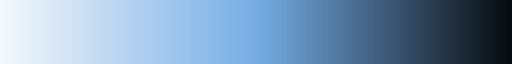

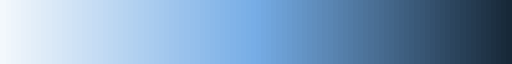

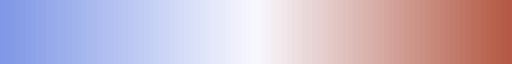

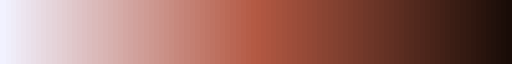

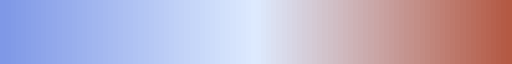

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colormap
# With 1.) blue from paper 129,152,255 2.) almost white, 3.) orange/brown from other figures (147,89,67) or (156,...) and
colors1 = [(129/255, 153/255, 231/255),(0.95, 0.95, 1),(147/255, 89/255, 67/255)]  #
colors1 = [(129/255, 153/255, 231/255),(0.95, 0.95, 1),(180/255, 89/255, 67/255)]  #
colors1 = [(127/255, 152/255, 231/255),(0.975, 0.975, 1),(180/255, 89/255, 67/255)]  #best so far value

# Adapted for Actor
# colors2 = [(127/255, 152/255, 231/255),(205/255,225/255, 249/255),(180/255, 89/255, 67/255)]  #nice
# colors2 = [(222/255, 235/255, 251/255),(127/255,157/255, 231/255),(0,0,0.2)]  #nice
# colors2 = [(180/255, 89/255, 67/255),(127/255, 152/255, 231/255),(0,0,0.2)]  #nice
colors2 = [(127/255, 152/255, 231/255),(0.95, 0.95, 1),(180/255, 89/255, 67/255),(0,0,0)]  #best so far actor, like twilight_shifted

# Adapted color2 for value
colors3 = [(127/255, 152/255, 231/255),(0.95, 0.95, 1),(180/255, 89/255, 67/255),(0.2,0.1,0.06)]  #similar but not fully black (better value, worse actor)
# colors3 = [(127/255, 152/255, 231/255),(0.95, 0.95, 1),(180/255, 89/255, 67/255),(0.4,0.2,0.12)]  #similar but not fully black (better value, worse actor)



colors4 = [(127/255, 152/255, 231/255),(222/255, 235/255, 255/255),(180/255, 89/255, 67/255),(0.2,0.1,0.06)]  #similar but not fully black (better value, worse actor)
colors4 = [(127/255, 152/255, 231/255),(222/255, 235/255, 255/255),(180/255, 89/255, 67/255)]  #similar but not fully black (better value, worse actor)

# (0.95, 0.95, 1),
n_bins = 100  # Number of bins
cmap_name = "cmap_blue_white_orange"
cmap_blue_white_orange = LinearSegmentedColormap.from_list(cmap_name, colors1, N=n_bins)
cmap_name = "cmap_dark_orange_white_blue"
cmap_dark_orange_white_blue = LinearSegmentedColormap.from_list(cmap_name, colors2, N=n_bins)
cmap_name = "cmap_dark_orange_white_blue2"
cmap_dark_orange_white_blue2 = LinearSegmentedColormap.from_list(cmap_name, colors3, N=n_bins)


cmap_name = "cmap_dark_orange_white_blue3"
cmap_dark_orange_white_blue3 = LinearSegmentedColormap.from_list(cmap_name, colors4, N=n_bins)


#"Blues" Colormap adapted
# colors4 = [(243/255, 248/255, 252/255),(79/255, 135/255, 188/255),(0.09294118, 0.15882353, 0.22117647)]  #
# colors4 = [(243/255, 248/255, 252/255),(118/255, 173/255, 230/255),(0.09294118, 0.15882353, 0.22117647)]  #
# colors4 = [(243/255, 248/255, 252/255),(118/255, 173/255, 230/255),(0.07435294, 0.12705882, 0.17694118)]  # 118,173,230 is darkest blue of paper
blues1 = [(243/255, 248/255, 252/255),(118/255, 173/255, 230/255),(0.05576471, 0.09529412, 0.13270588)]  # 118,173,230 is darkest blue of paper
blues2 = [(243/255, 248/255, 252/255),(118/255, 173/255, 230/255),(0.02788235, 0.04764706, 0.06635294)]  # 118,173,230 is darkest blue of paper
blues3 = [(243/255, 248/255, 252/255),(118/255, 173/255, 230/255),(0,0,0)]  # 118,173,230 is darkest blue of paper
# blues2 = [(243/255, 248/255, 252/255),(118/255, 173/255, 230/255),(0.05, 0.09, 0.12)]  # a bit less dark max
# colors4 = [(243/255, 248/255, 252/255),(118/255, 173/255, 230/255),(0.1, 0.18, 0.24)]  #even less dark max
# blues1 = [(222/255, 235/255, 251/255),(118/255, 173/255, 230/255),(0.09294118, 0.15882353, 0.22117647)]  # 118,173,230 is darkest blue of paper
blues1 = [(243/255, 248/255, 252/255),(118/255, 173/255, 230/255),(0.09294118, 0.15882353, 0.22117647)]  # 118,173,230 is darkest blue of paper

cmap_name = "blues_custom"
blues_custom = LinearSegmentedColormap.from_list(cmap_name, blues1, N=n_bins)
cmap_name = "blues_custom2"
blues_custom_darker = LinearSegmentedColormap.from_list(cmap_name, blues2, N=n_bins)
cmap_name = "blues_custom3"
blues_custom_darkest = LinearSegmentedColormap.from_list(cmap_name, blues2, N=n_bins)

#Same but with Orange brown
reds = [(0.95, 0.95, 1),(180/255, 89/255, 67/255),(0.2,0.1,0.06)]  # 118,173,230 is darkest blue of paper
reds = [(0.95, 0.95, 1),(180/255, 89/255, 67/255),(0.1,0.05,0.03)]  # 118,173,230 is darkest blue of paper

cmap_name = "reds_custom"
reds_custom = LinearSegmentedColormap.from_list(cmap_name, reds, N=n_bins)

# 118,173,230

# 243,248,252 
# 159,196,220
# 28,53,112

display(blues_custom_darker)
display(blues_custom)
display(cmap_blue_white_orange)
display(reds_custom)
display(cmap_dark_orange_white_blue3)

# Final Figure

### Load

In [7]:
# Normal with random mapping

#Note: extract files in results folder first!

path='../results/'
name1='Watermaze_optimum_memristor_emulation' #T0.125 - lowest #steps

# Low Noise
name2='Watermaze_optimum_min_noise_emulation' #LR0p1,T0.125 - lowest #steps min. noise


result1=pd.read_pickle(path+name1)
display(result1)
result_low_noise1=pd.read_pickle(path+name2)
display(result_low_noise1)




,LR,T,step_size,std_dev_rbf,seeds,threshold,gamma,num_episodes,chunk_size,mean_final_steps,mean_final_rewards,rewards_list,steps_list,environments,critic_weights_list,actor_weights_list,snapshot_list_critic,snapshot_list_actor,mean_final_critic_weights,mean_final_actor_weights
0,0.05,0.125,1.5,0.75,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0025,0.975,[50000],1,13.73,1.0,"[[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[[4.0, 300.0, 228.0, 300.0, 284.0, 34.0, 74.0,...",[<src.environments.WaterMaze object at 0x29490...,"[[0.5656027206032795, 0.4346424653889989, 0.39...","[[[0.6155831424389294, 0.4275145398534247, 0.4...","[[[0.3099354451147397, 0.4022086196219284, 0.4...",[[[[0.44503461 0.39245174 0.45762281 0.2892470...,"[[0.5656027206032802, 0.43464246538899887, 0.3...","[[[0.6155831424389292, 0.4275145398534257, 0.4..."


,LR,T,step_size,std_dev_rbf,seeds,threshold,gamma,num_episodes,chunk_size,mean_final_steps,mean_final_rewards,rewards_list,steps_list,environments,critic_weights_list,actor_weights_list,snapshot_list_critic,snapshot_list_actor,mean_final_critic_weights,mean_final_actor_weights
0,0.1,0.125,1.5,0.75,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0025,0.975,[50000],1,11.61,1.0,"[[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,...","[[4.0, 13.0, 300.0, 63.0, 300.0, 121.0, 300.0,...",[<src.environments.WaterMaze object at 0x116f1...,"[[0.6663313816633263, 0.4956524429588622, 0.21...","[[[0.7785579915126547, 0.3765583104439139, 0.3...","[[[0.3466668658825474, 0.3342764320178643, 0.1...",[[[[0.51403437 0.55746632 0.51828928 0.4635820...,"[[0.6968473610107693, 0.4168622219494342, 0.18...","[[[0.7785579915126557, 0.3765583104439141, 0.3..."


## Plot

#### First mean and std. dev, then running avg

---Memristor Run:----
max steps after training 94.0
min steps after training 1.0
std dev after training 14.468486444683833
---Low Noise Memristor Run:---
max steps after training 78.0
min steps after training 1.0
std dev after training 10.154698419943351


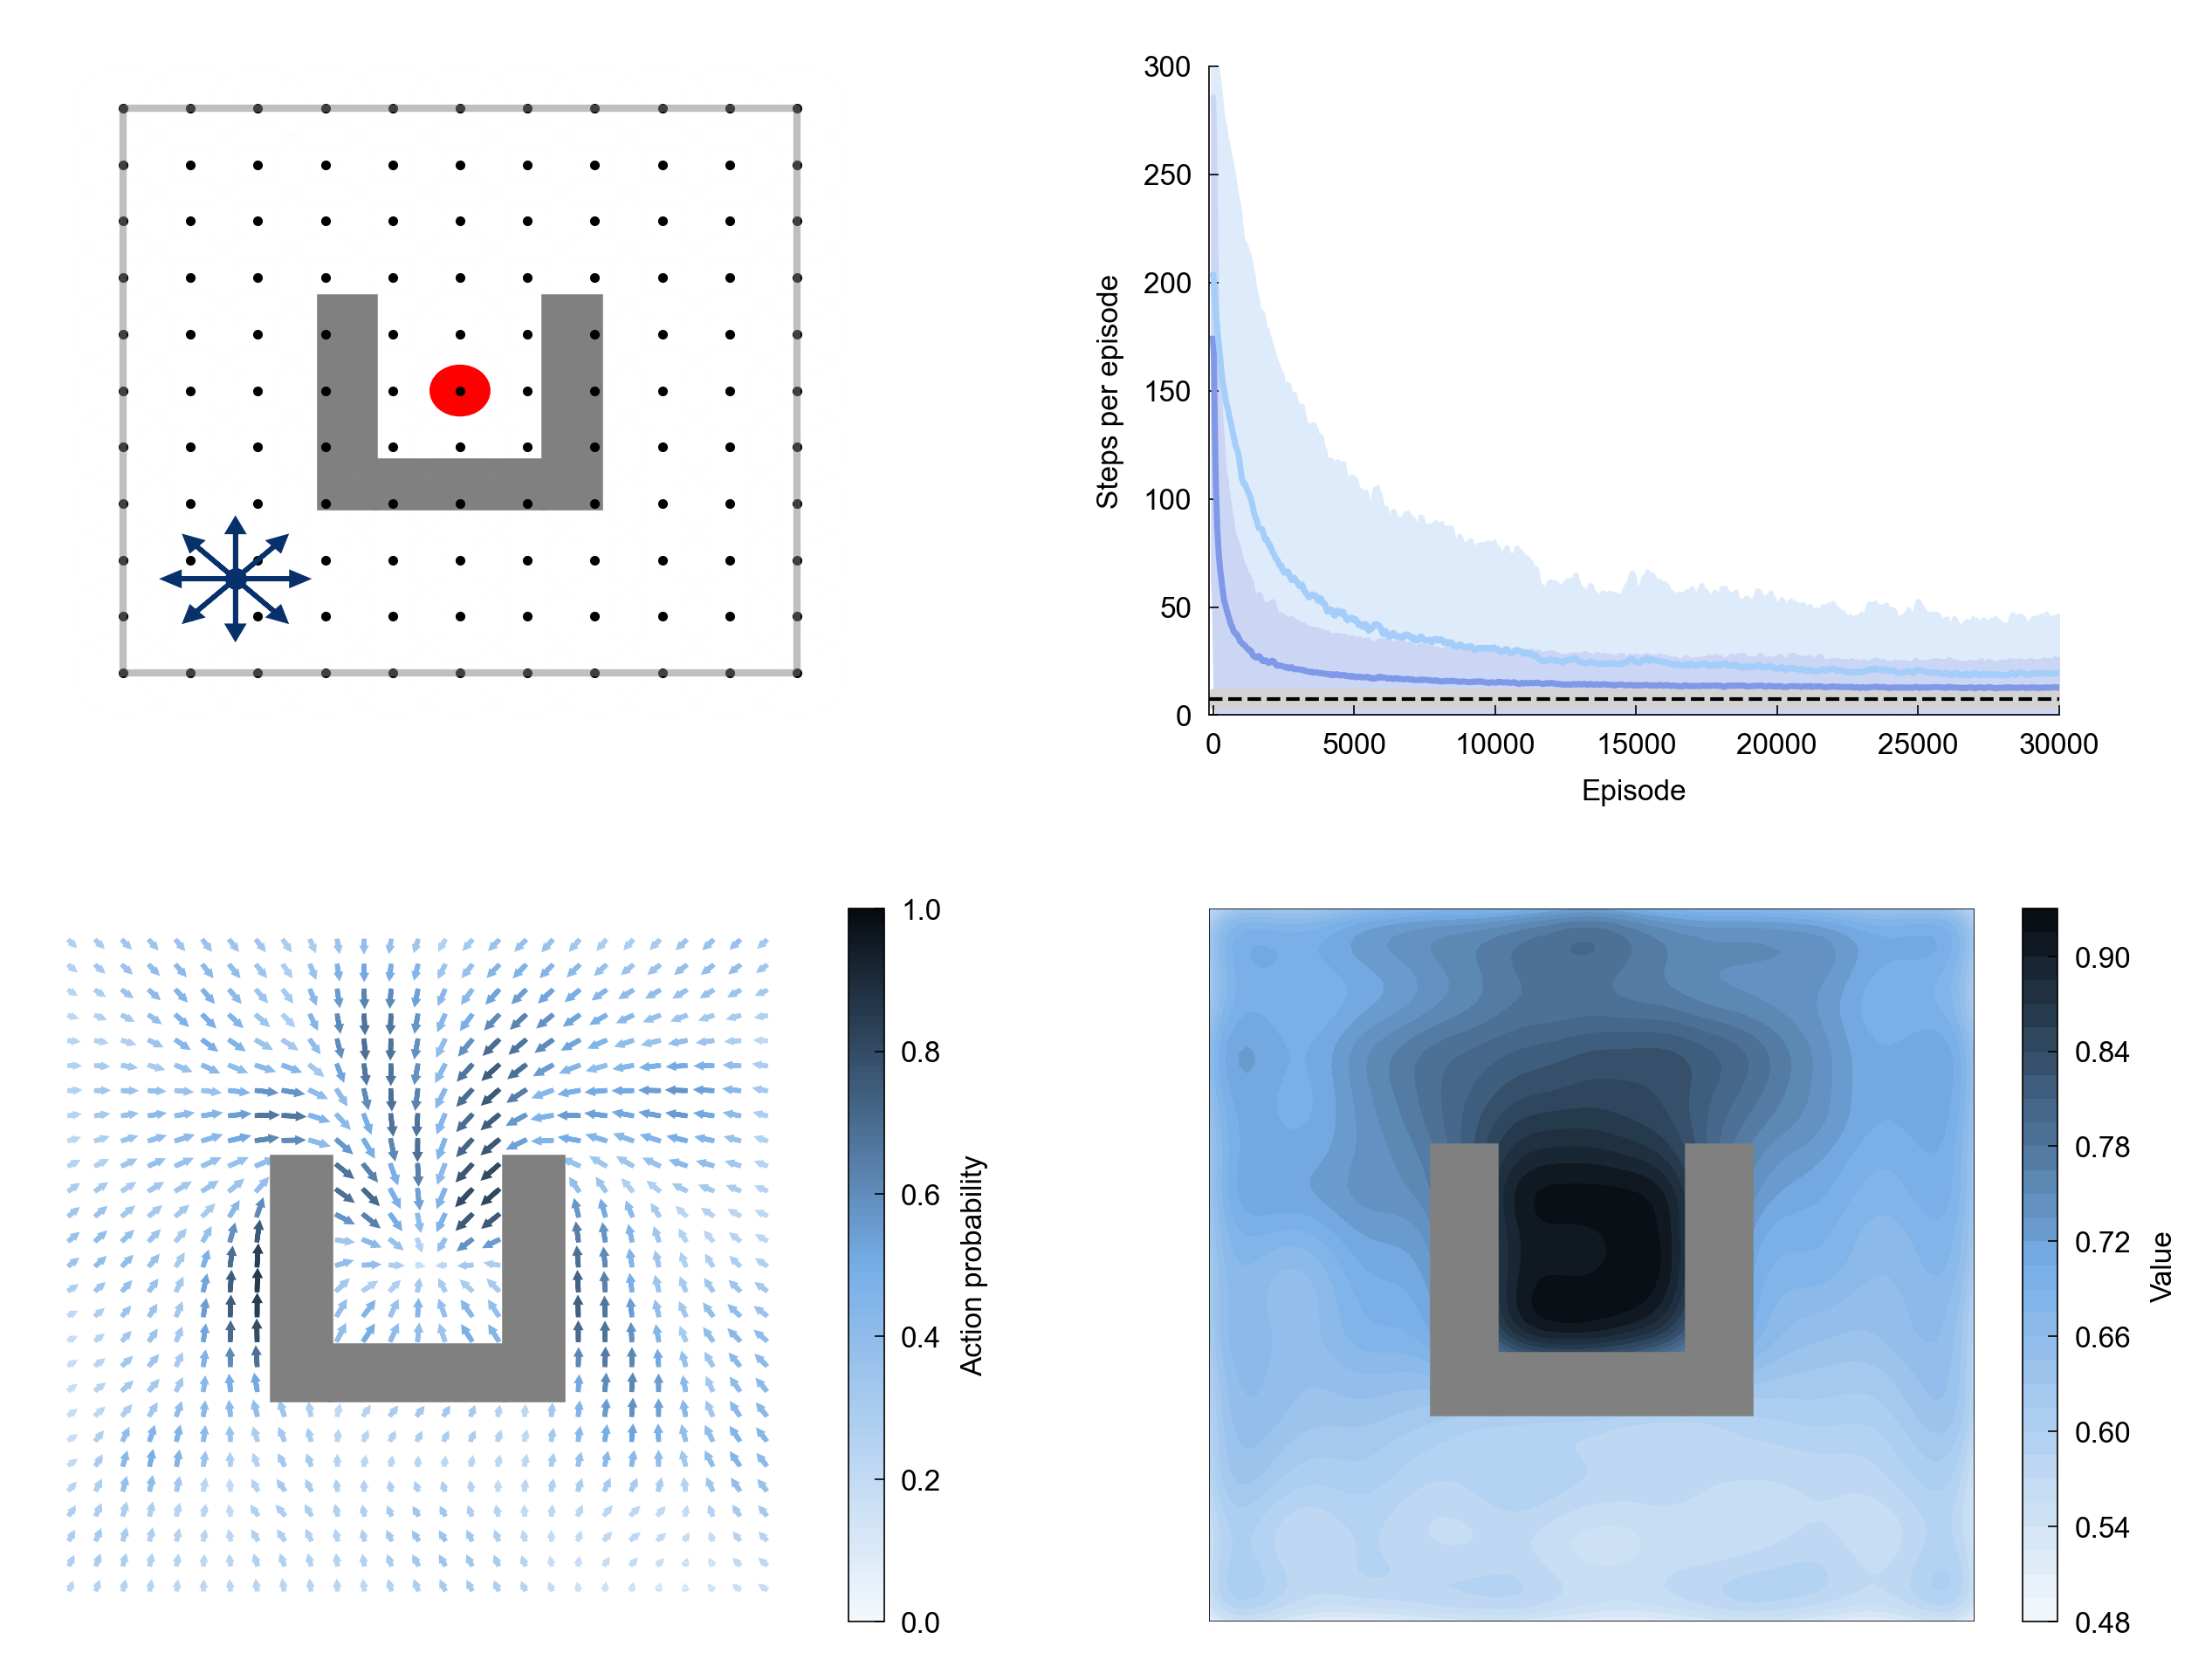

In [20]:
# Reload libraries and Classes
from importlib import reload 
reload(src.environments)
reload(src.rl)
from src.rl import ActorCriticWaterMaze

from src.environments import WaterMaze

# Plot
font_size=6
#Plot Size----------
axis_thickness=0.3
params = {'figure.figsize': (20/2.54,15/2.54), #21cm is width of A4
          'legend.fontsize': str(font_size-1), #otherwise huge legend
          'axes.labelsize': str(font_size),
          'axes.titlesize': str(font_size),
          'xtick.labelsize':str(font_size), #was font_size-1
          'ytick.labelsize':str(font_size), #was font_size-1}
          
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.major.size': 2,
          'ytick.major.size': 2,
          'xtick.major.width':axis_thickness,
          'ytick.major.width':axis_thickness,
          'axes.linewidth':str(axis_thickness),
          'axes.spines.top': False,
          'axes.spines.right': False,
          #Font
          'svg.fonttype': 'none', #editable fonts in svg
          'font.family': 'Arial',
          }

pylab.rcParams.update(params)

# seed=10 #optimum no random mapping
# seed=29

#Average over Seeds
# n_seeds_avg=100
# start_idx=29
# start_idx=0

#Running Average
window_size_avg=100

# Plotting of Steps
max_episode=30000
start=0
step=int(max_episode/1000) #limit number of plot points for smaller file

#Policy Map and Value Map settings
n_points_actor=27#31#23 #number of grid points in policy map (arrows per full width)
n_lvs_critic=35#20#15#10#25 #number of lvls in value map

# n_points_actor=31#31#23 #number of grid points in policy map (arrows per full width)
# n_lvs_critic=35#15#10#25 #number of lvls in value map

position=[-4,-4]

#Colormap
# cmap_c=cmap_dark_orange_white_blue3
# cmap_c=blues_custom_darker
# cmap_c=reds_custom

# cmap_actor=cmap_c
# cmap_value=cmap_c
cmap_actor=blues_custom_darkest
cmap_value=blues_custom_darker

# cmap_value=cmap_dark_orange_white_blue2
# cmap_actor=cmap_dark_orange_white_blue

n_std=1
num_episodes_avg=100

r=result1.iloc[0]
r_ln=result_low_noise1.iloc[0]

no_states=11*11
n_episodes=r['num_episodes'][0]
T=r['T']
std_dev_rbf=r['std_dev_rbf']
step_size=r['step_size']

#Init Watermaze
net = ActorCriticWaterMaze(no_states, T)
env = WaterMaze(no_states, st_dev=std_dev_rbf, step_size=step_size, w_scale=1)

#Get Steps and Rewards
rewards=r['rewards_list']
lengths=r['steps_list']

rewards_ln=r_ln['rewards_list']
lengths_ln=r_ln['steps_list']

#mean
mean_rewards=np.mean(rewards,axis=0)
mean_lengths=np.mean(lengths,axis=0)
mean_rewards_ln=np.mean(rewards_ln,axis=0)
mean_lengths_ln=np.mean(lengths_ln,axis=0)

std_dev_rewards=np.std(rewards,axis=0)
std_dev_steps=np.std(lengths,axis=0)
std_dev_rewards_ln=np.std(rewards_ln,axis=0)
std_dev_steps_ln=np.std(lengths_ln,axis=0)

#running avg
mean_rewards_ravg=moving_average(mean_rewards,window_size_avg)
mean_lengths_ravg=moving_average(mean_lengths,window_size_avg)
mean_rewards_ravg_ln=moving_average(mean_rewards_ln,window_size_avg)
mean_lengths_ravg_ln=moving_average(mean_lengths_ln,window_size_avg)

std_rewards_ravg=moving_average(std_dev_rewards,window_size_avg)
std_lengths_ravg=moving_average(std_dev_steps,window_size_avg)
std_rewards_ravg_ln=moving_average(std_dev_rewards_ln,window_size_avg)
std_lengths_ravg_ln=moving_average(std_dev_steps_ln,window_size_avg)

#Check Max an min Steps on Memristors
print('---Memristor Run:----')
print('max steps after training',np.max(lengths[:,-1]))
print('min steps after training',np.min(lengths[:,-1]))
print('std dev after training',std_dev_steps[-1])

print('---Low Noise Memristor Run:---')
print('max steps after training',np.max(lengths_ln[:,-1]))
print('min steps after training',np.min(lengths_ln[:,-1]))
print('std dev after training',std_dev_steps_ln[-1])

#------Weights---------------
# mean of n seeds
# print('shape',np.array(r['snapshot_list_actor'][0])[:,int(max_episode/1000),:,:])
net.w_a=np.mean(np.array(r['snapshot_list_actor'])[:,int(max_episode/1000),:,:],axis=0)
net.w_v=np.mean(np.array(r['snapshot_list_critic'])[:,int(max_episode/1000),:],axis=0)


# -- Plot --
plot_points11 = np.arange(len(mean_lengths_ravg))
plot_points12 = np.arange(len(mean_lengths))

plot_points21 = np.arange(len(std_rewards_ravg))
plot_points22 = np.arange(len(std_dev_steps))

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, dpi=400)
fig = plt.figure(dpi=400)

gs = GridSpec(100,100) #100x100 grid points -
ax1 = plt.subplot(gs[:45, :40]) #[y,x]
ax2 = plt.subplot(gs[2:43, 55:95])
ax3 = plt.subplot(gs[55:, :45])
ax4 = plt.subplot(gs[55:, 55:])

render(env,ax=ax1,position=position,draw_rbf=True)

#With Running average
ax2.plot(plot_points11[start::step], mean_lengths_ravg[start::step],color='#a4cefa',linewidth=1.25,zorder=10) #7f98e7ff
ax2.plot(plot_points11[start::step], mean_lengths_ravg_ln[start::step],color='#7f98e7ff',linewidth=1.25) #

# Std Dev. with running average
ax2.fill_between(plot_points21[start::step],np.clip(mean_lengths_ravg-n_std*std_lengths_ravg,0,300)[start::step], np.clip(mean_lengths_ravg+n_std*std_lengths_ravg,0,300)[start::step],color='#deebfbff') # cbd6f5ff
ax2.fill_between(plot_points21[start::step],np.clip(mean_lengths_ravg_ln-n_std*std_lengths_ravg_ln,0,300)[start::step], np.clip(mean_lengths_ravg_ln+n_std*std_lengths_ravg_ln,0,300)[start::step],color='#cbd6f5ff') # 


#SW Reference
mean_sw=7.34 #Grid_Search_1k_step1p5_LR1p2_gamma0p975_ideal_SW - LR1.2, T0.1
std_sw= 3.6909643744723932#
ax2.axhline(y=mean_sw, color='black', linestyle='--',linewidth=0.75)

x=np.array([-10,n_episodes])
y=np.array([mean_sw,mean_sw])

ax2.fill_between(x,np.clip(y-n_std*std_sw,0,300), np.clip(y+n_std*std_sw,0,300),color='lightgray') # cbd6f5ff

ax2.set_xlim([-150,max_episode])
ax2.set_ylim([0,300])
ax2.set_xlabel("Episode")
ax2.set_ylabel("Steps per episode")

env.render_actions(net, ax3, dense=True, magnitude=True,n_points=n_points_actor,colormap=cmap_actor)

env.render_values(net, ax4, show_rbf=True,lvls=n_lvs_critic,colormap=cmap_value)

# fig.subplots_adjust(wspace=0.25, hspace=0.3)
plt.show()

In [21]:
#Save Figure
path='/Volumes/ztill/Documents/1_Data_Analysis/Paper_RL_Memristors/'
name='Figure_5_plots_mean_std_then_ravg'
os.makedirs(path,exist_ok=True)
fig.savefig(path+name+'.svg',format='svg',bbox_inches='tight',) #Save SVG
fig.savefig(path+name+'.png',dpi=600,format='png',bbox_inches='tight') #Save jpg

#### First running mean and then std and mean

(100, 50000)
(100, 50001)
(50001,)
(50001,)
---Memristor Run:----
max steps after training 94.0
min steps after training 1.0
std dev after training ravg 10.729207061101954
std dev after training 14.468486444683839
---Low Noise Memristor Run:---
max steps after training 78.0
min steps after training 1.0
std dev after training ravg 2.0326267143772365
std dev after training 10.154698419943353


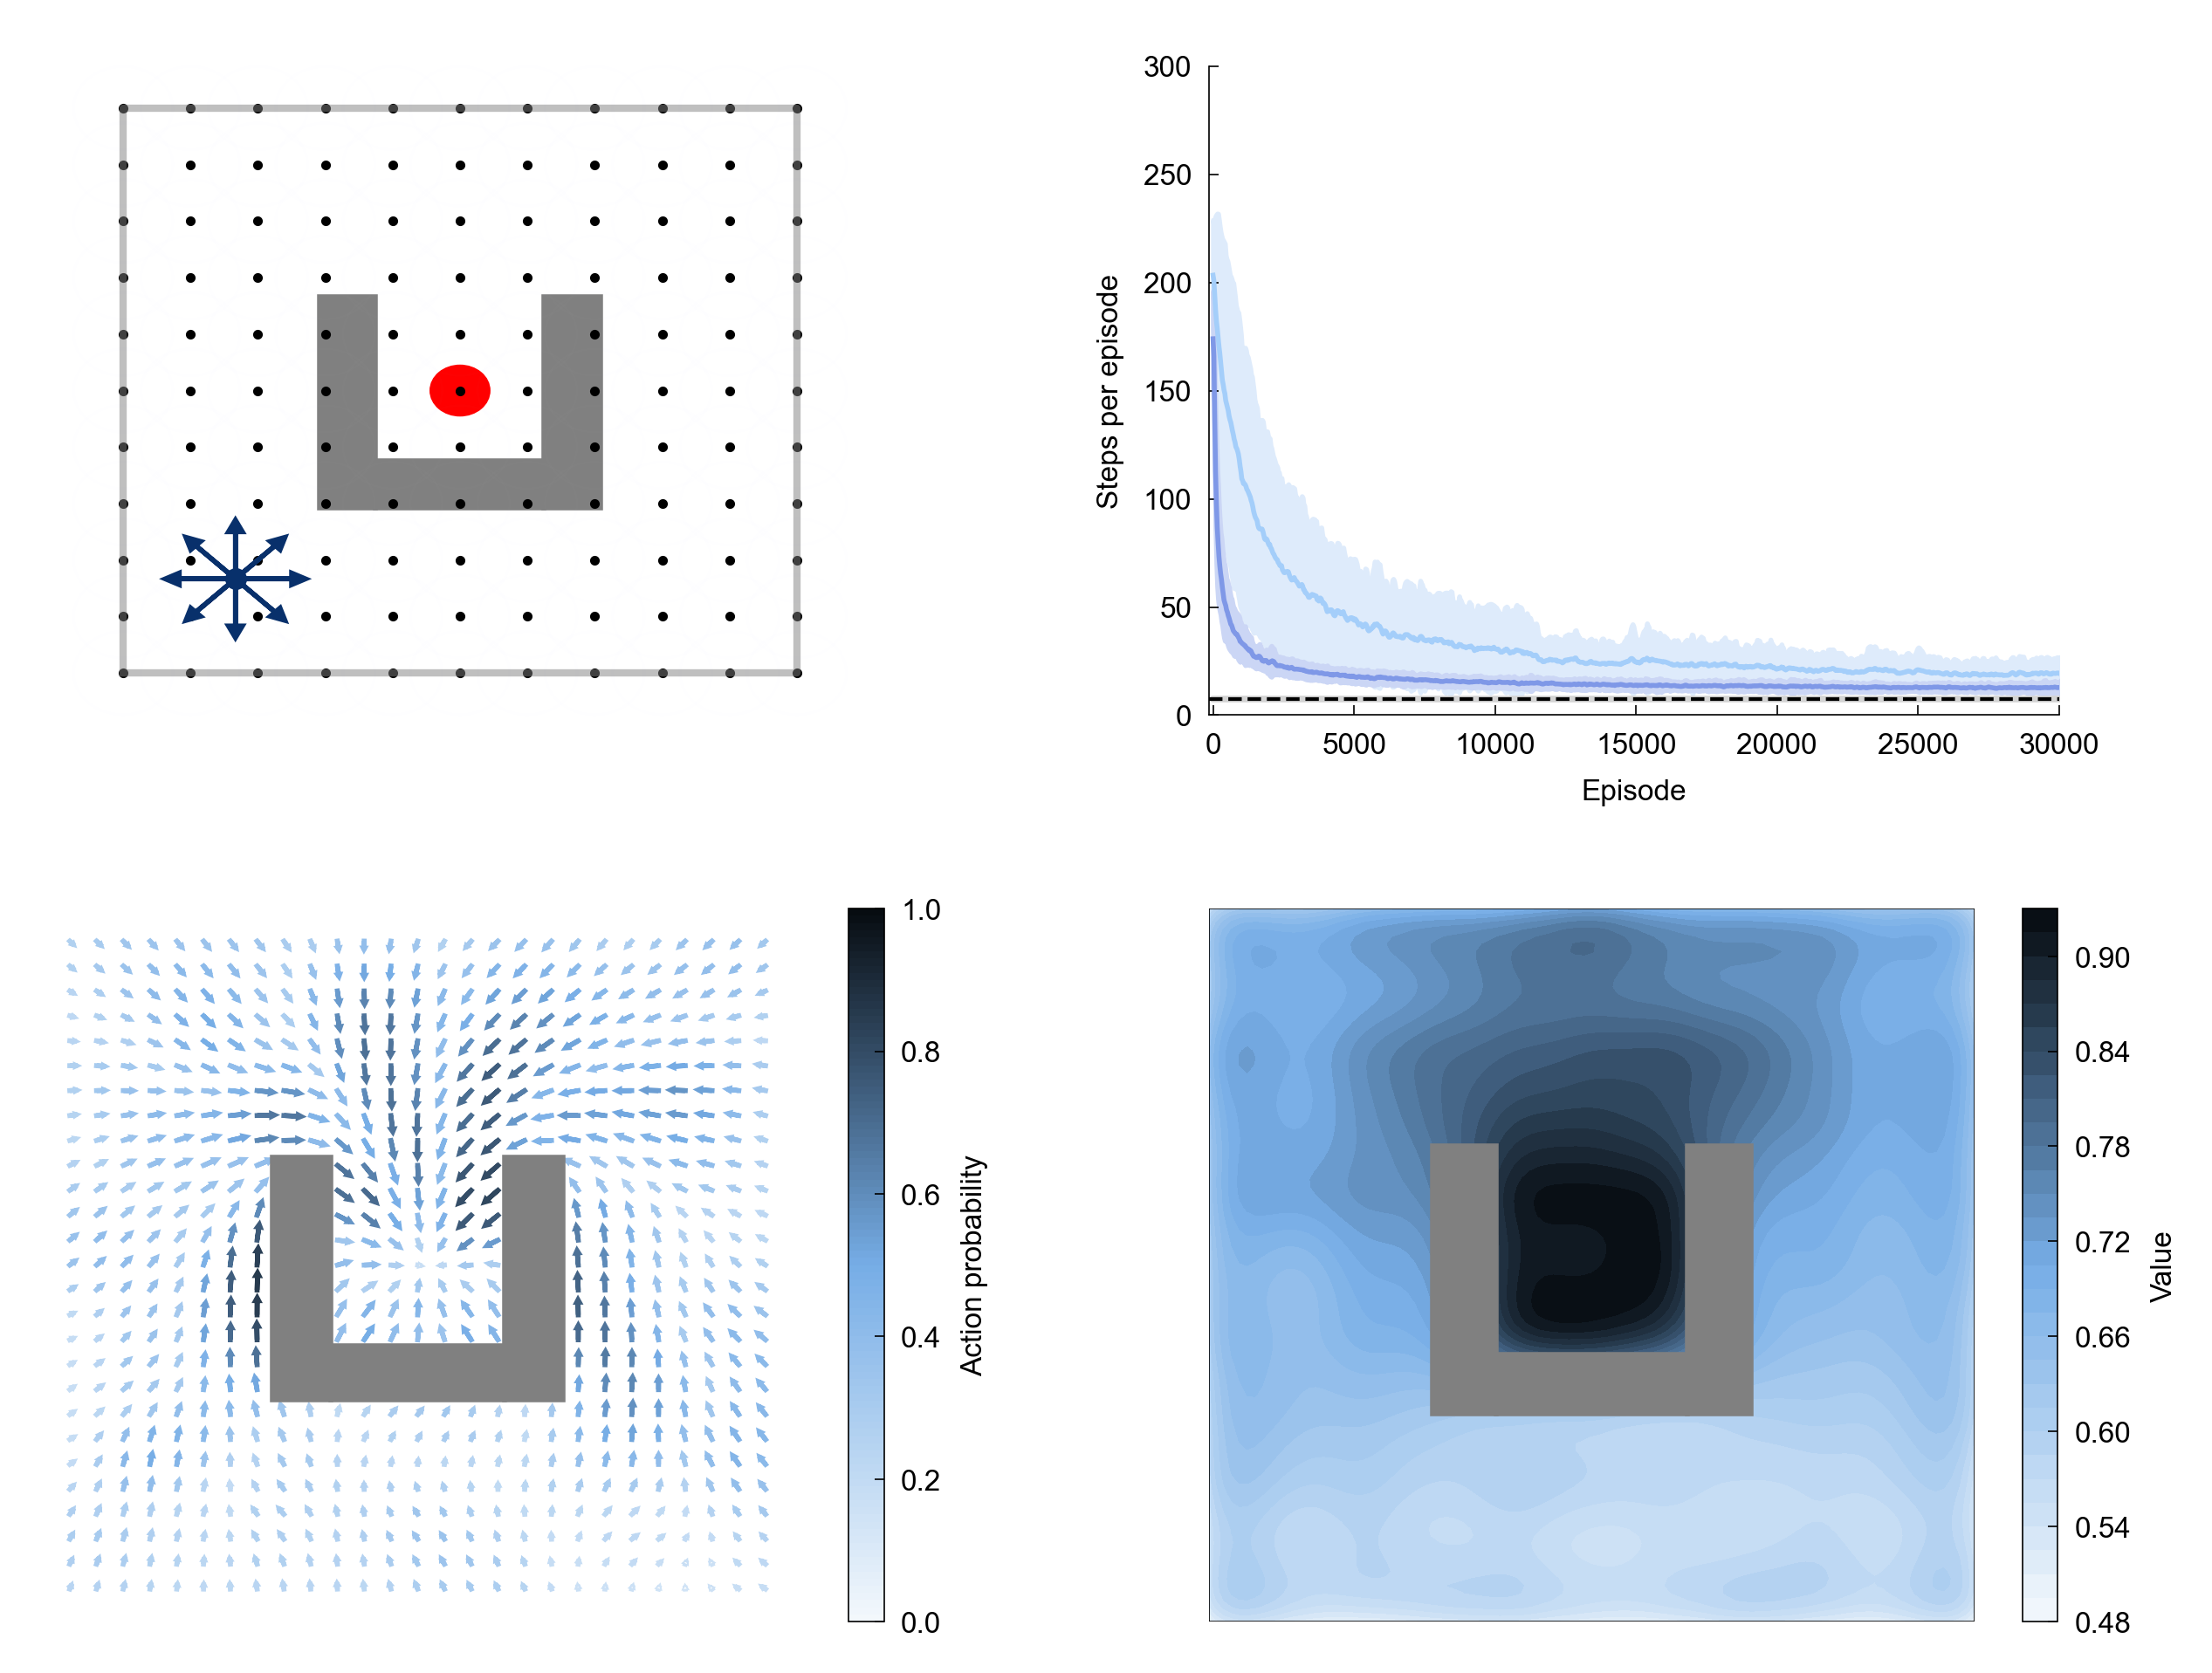

In [22]:
# Reload libraries and Classes
from importlib import reload 
reload(src.environments)
reload(src.rl)
from src.rl import ActorCriticWaterMaze

from src.environments import WaterMaze


# Plot
font_size=6
#Plot Size----------
axis_thickness=0.3
params = {'figure.figsize': (20/2.54,15/2.54), #21cm is width of A4
          'legend.fontsize': str(font_size-1), #otherwise huge legend
          'axes.labelsize': str(font_size),
          'axes.titlesize': str(font_size),
          'xtick.labelsize':str(font_size), #was font_size-1
          'ytick.labelsize':str(font_size), #was font_size-1}
          
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.major.size': 2,
          'ytick.major.size': 2,
          'xtick.major.width':axis_thickness,
          'ytick.major.width':axis_thickness,
          'axes.linewidth':str(axis_thickness),
          'axes.spines.top': False,
          'axes.spines.right': False,
          #Font
          'svg.fonttype': 'none', #editable fonts in svg
          'font.family': 'Arial',
          }

pylab.rcParams.update(params)
# print('OS Font:',plt.rcParams["font.family"][0])

# seed=10 #optimum no random mapping
# seed=29

#Average over Seeds
# n_seeds_avg=100
# start_idx=29
# start_idx=0

#Running Average
window_size_avg=100

# Plotting of Steps
max_episode=30000
start=0
step=int(max_episode/1000) #limit number of plot points for smaller file

#Policy Map and Value Map settings
n_points_actor=27#31#23 #number of grid points in policy map (arrows per full width)
n_lvs_critic=35#20#15#10#25 #number of lvls in value map

# n_points_actor=31#31#23 #number of grid points in policy map (arrows per full width)
# n_lvs_critic=35#15#10#25 #number of lvls in value map

position=[-4,-4]

#Colormap
cmap_actor=blues_custom_darkest
cmap_value=blues_custom_darker

# cmap_value=cmap_dark_orange_white_blue2
# cmap_actor=cmap_dark_orange_white_blue

n_std=1
num_episodes_avg=100

r=result1.iloc[0]
r_ln=result_low_noise1.iloc[0]

no_states=11*11
n_episodes=r['num_episodes'][0]
T=r['T']
std_dev_rbf=r['std_dev_rbf']
step_size=r['step_size']

#Init Watermaze
net = ActorCriticWaterMaze(no_states, T)
env = WaterMaze(no_states, st_dev=std_dev_rbf, step_size=step_size, w_scale=1)

#Get Steps and Rewards
rewards=r['rewards_list']
lengths=r['steps_list']

rewards_ln=r_ln['rewards_list']
lengths_ln=r_ln['steps_list']

print(np.shape(rewards))
#running avg
n_seeds=100
rewards_ravg=[]
lengths_ravg=[]
rewards_ravg_ln=[]
lengths_ravg_ln=[]
for i in range(n_seeds):
    rewards_ravg.append(moving_average(rewards[i],window_size_avg))
    lengths_ravg.append(moving_average(lengths[i],window_size_avg))
    rewards_ravg_ln.append(moving_average(rewards_ln[i],window_size_avg))
    lengths_ravg_ln.append(moving_average(lengths_ln[i],window_size_avg))

rewards_ravg=np.array(rewards_ravg)
lengths_ravg=np.array(lengths_ravg)
rewards_ravg_ln=np.array(rewards_ravg_ln)
lengths_ravg_ln=np.array(lengths_ravg_ln)
print(np.shape(rewards_ravg))

#-mean-

mean_rewards=np.mean(rewards_ravg,axis=0)
mean_lengths=np.mean(lengths_ravg,axis=0)
mean_rewards_ln=np.mean(rewards_ravg_ln,axis=0)
mean_lengths_ln=np.mean(lengths_ravg_ln,axis=0)


print(np.shape(mean_rewards))

#-std. dev-
std_dev_rewards=np.std(rewards_ravg,axis=0)
std_dev_steps=np.std(lengths_ravg,axis=0)
std_dev_rewards_ln=np.std(rewards_ravg_ln,axis=0)
std_dev_steps_ln=np.std(lengths_ravg_ln,axis=0)

print(np.shape(std_dev_rewards))


#Check Max an min Steps on Memristors
print('---Memristor Run:----')
print('max steps after training',np.max(lengths[:,-1]))
print('min steps after training',np.min(lengths[:,-1]))
print('std dev after training ravg',std_dev_steps[-1])
print('std dev after training',np.std(lengths[:,-1]))

print('---Low Noise Memristor Run:---')
print('max steps after training',np.max(lengths_ln[:,-1]))
print('min steps after training',np.min(lengths_ln[:,-1]))
print('std dev after training ravg',std_dev_steps_ln[-1])
print('std dev after training',np.std(lengths_ln[:,-1]))


#------Weights---------------
# mean of n seeds
net.w_a=np.mean(np.array(r['snapshot_list_actor'])[:,int(max_episode/1000),:,:],axis=0)
net.w_v=np.mean(np.array(r['snapshot_list_critic'])[:,int(max_episode/1000),:],axis=0)


# -- Plot --
plot_points11 = np.arange(len(mean_lengths_ravg))
# plot_points12 = np.arange(len(mean_lengths))

plot_points21 = np.arange(len(std_rewards_ravg))
# plot_points22 = np.arange(len(std_dev_steps))

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, dpi=400)
fig = plt.figure(dpi=400)

gs = GridSpec(100,100) #100x100 grid points -
ax1 = plt.subplot(gs[:45, :40]) #[y,x]
ax2 = plt.subplot(gs[2:43, 55:95])
ax3 = plt.subplot(gs[55:, :45])
ax4 = plt.subplot(gs[55:, 55:])

render(env,ax=ax1,position=position,draw_rbf=True)

#With Running average
ax2.plot(plot_points12[start::step], mean_lengths[start::step],color='#a4cefa',linewidth=1) #7f98e7ff
ax2.plot(plot_points12[start::step], mean_lengths_ln[start::step],color='#7f98e7ff',linewidth=1) #

# Std Dev. with running average
ax2.fill_between(plot_points22[start::step],np.clip(mean_lengths-n_std*std_dev_steps,0,300)[start::step], np.clip(mean_lengths+n_std*std_dev_steps,0,300)[start::step],color='#deebfbff') # cbd6f5ff
ax2.fill_between(plot_points22[start::step],np.clip(mean_lengths_ln-n_std*std_dev_steps_ln,0,300)[start::step], np.clip(mean_lengths_ln+n_std*std_dev_steps_ln,0,300)[start::step],color='#cbd6f5ff') # 


#SW Reference
mean_sw= 7.3411 #Grid_Search_1k_step1p5_LR1p2_gamma0p975_ideal_SW - LR1.2, T0.1
std_sw= 0.4452929260610368
ax2.axhline(y=mean_sw, color='black', linestyle='--',linewidth=0.75)

x=np.array([-10,n_episodes])
y=np.array([mean_sw,mean_sw])

ax2.fill_between(x,np.clip(y-n_std*std_sw,0,300), np.clip(y+n_std*std_sw,0,300),color='lightgray') # cbd6f5ff

ax2.set_xlim([-150,max_episode])
ax2.set_ylim([0,300])
ax2.set_xlabel("Episode")
ax2.set_ylabel("Steps per episode")

env.render_actions(net, ax3, dense=True, magnitude=True,n_points=n_points_actor,colormap=cmap_actor)

env.render_values(net, ax4, show_rbf=True,lvls=n_lvs_critic,colormap=cmap_value)

# fig.subplots_adjust(wspace=0.25, hspace=0.3)
plt.show()

In [23]:
#Save Figure
path='/Volumes/ztill/Documents/1_Data_Analysis/Paper_RL_Memristors/'
name='Figure_5_plots_ravg_then_mean_std'
os.makedirs(path,exist_ok=True)
fig.savefig(path+name+'.svg',format='svg',bbox_inches='tight',) #Save SVG
fig.savefig(path+name+'.png',dpi=600,format='png',bbox_inches='tight') #Save jpg

#### No Running Avg

(100, 50000)
(50000,)
(50000,)
---Memristor Run:----
max steps after training 94.0
min steps after training 1.0
std dev after training ravg 14.468486444683833
std dev after training 14.468486444683839
---Low Noise Memristor Run:---
max steps after training 78.0
min steps after training 1.0
std dev after training ravg 10.154698419943351
std dev after training 10.154698419943353


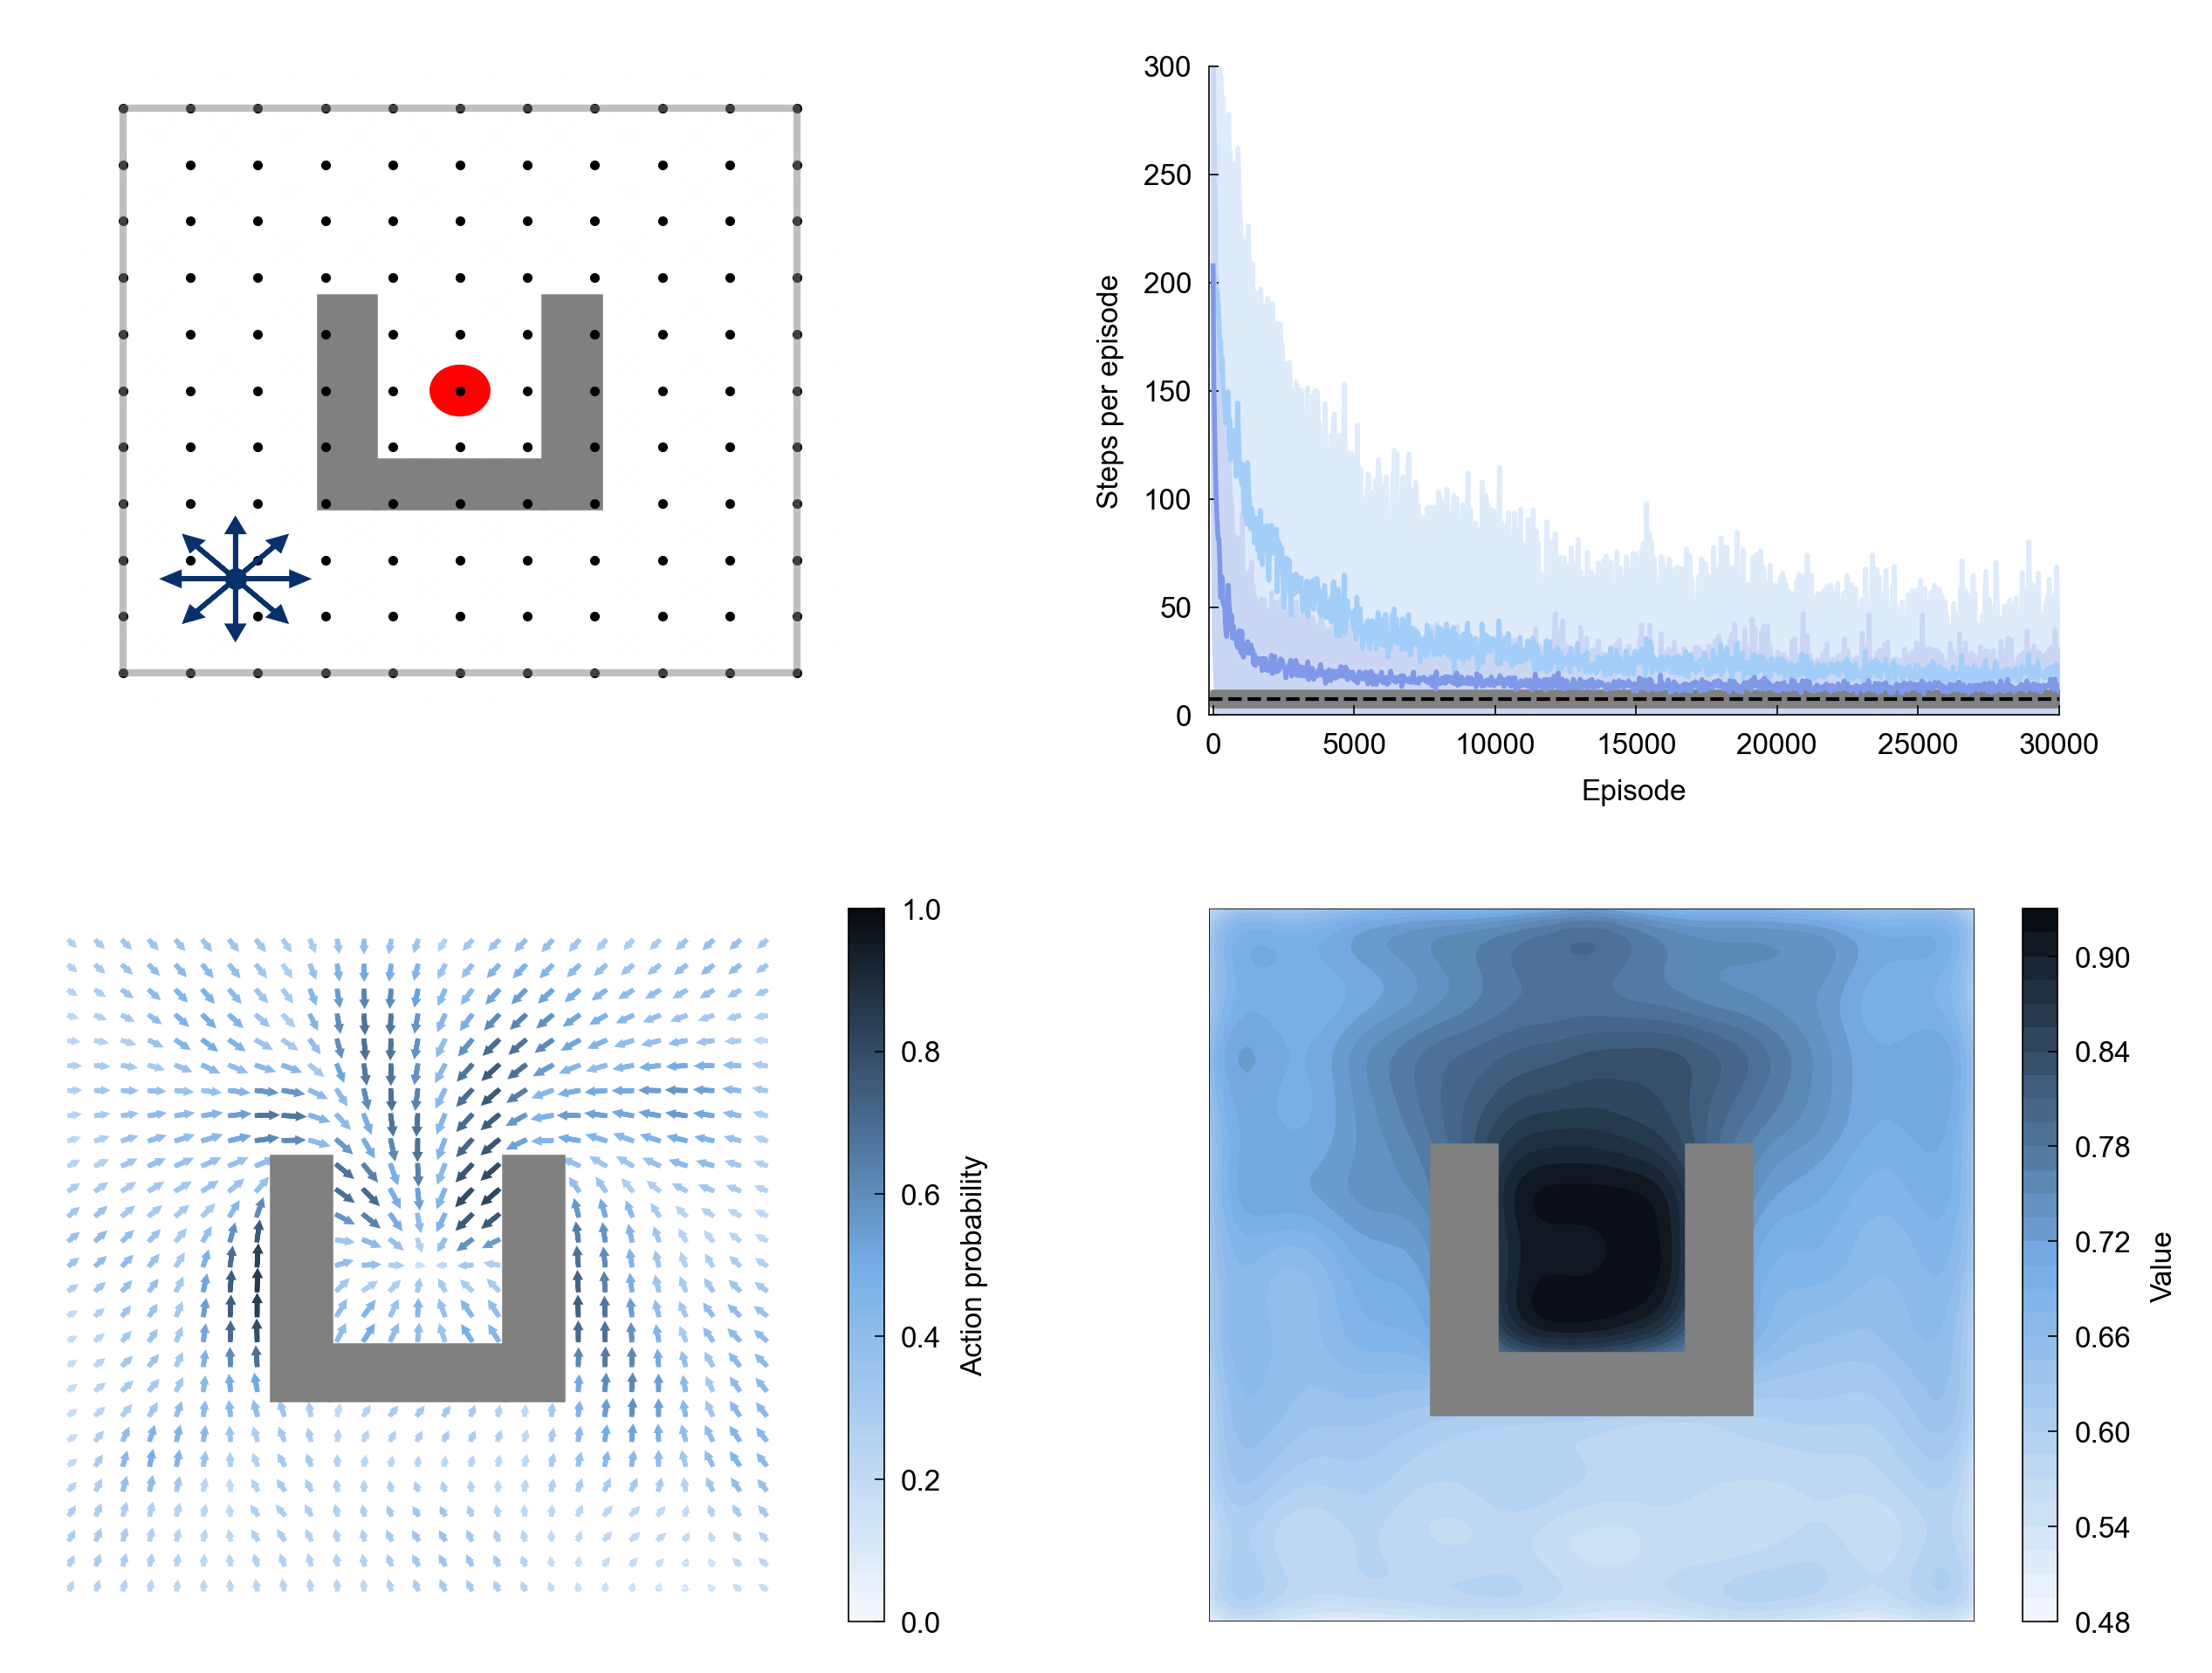

In [19]:
# Reload libraries and Classes
from importlib import reload 
reload(src.environments)
reload(src.rl)
from src.rl import ActorCriticWaterMaze

from src.environments import WaterMaze


# Plot
font_size=6
#Plot Size----------
axis_thickness=0.3
params = {'figure.figsize': (20/2.54,15/2.54), #21cm is width of A4
          'legend.fontsize': str(font_size-1), #otherwise huge legend
          'axes.labelsize': str(font_size),
          'axes.titlesize': str(font_size),
          'xtick.labelsize':str(font_size), #was font_size-1
          'ytick.labelsize':str(font_size), #was font_size-1}
          
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.major.size': 2,
          'ytick.major.size': 2,
          'xtick.major.width':axis_thickness,
          'ytick.major.width':axis_thickness,
          'axes.linewidth':str(axis_thickness),
          'axes.spines.top': False,
          'axes.spines.right': False,
          #Font
          'svg.fonttype': 'none', #editable fonts in svg
          'font.family': 'Arial',
          }

pylab.rcParams.update(params)
# print('OS Font:',plt.rcParams["font.family"][0])

# seed=10 #optimum no random mapping
seed=29

# #Average over Seeds
# n_seeds_avg=100
# start_idx=29
# start_idx=0

# Plotting of Steps
max_episode=30000
start=0
step=int(max_episode/1000) #limit number of plot points for smaller file

#Policy Map and Value Map settings
n_points_actor=27#31#23 #number of grid points in policy map (arrows per full width)
n_lvs_critic=35#20#15#10#25 #number of lvls in value map

position=[-4,-4]

#Colormap
cmap_actor=blues_custom_darkest
cmap_value=blues_custom_darker

# cmap_value=cmap_dark_orange_white_blue2
# cmap_actor=cmap_dark_orange_white_blue

n_std=1
num_episodes_avg=100

r=result1.iloc[0]
r_ln=result_low_noise1.iloc[0]

no_states=11*11
n_episodes=r['num_episodes'][0]

#Init Watermaze
net = ActorCriticWaterMaze(no_states, T)
env = WaterMaze(no_states, st_dev=std_dev_rbf, step_size=step_size, w_scale=1)

#Get Steps and Rewards
rewards=r['rewards_list']
lengths=r['steps_list']

rewards_ln=r_ln['rewards_list']
lengths_ln=r_ln['steps_list']

print(np.shape(rewards))

#-mean-
mean_rewards=np.mean(rewards,axis=0)
mean_lengths=np.mean(lengths,axis=0)
mean_rewards_ln=np.mean(rewards_ln,axis=0)
mean_lengths_ln=np.mean(lengths_ln,axis=0)

print(np.shape(mean_rewards))

#-std. dev-

std_dev_rewards=np.std(rewards,axis=0)
std_dev_steps=np.std(lengths,axis=0)
std_dev_rewards_ln=np.std(rewards_ln,axis=0)
std_dev_steps_ln=np.std(lengths_ln,axis=0)

print(np.shape(std_dev_rewards))


#Check Max an min Steps on Memristors
print('---Memristor Run:----')
print('max steps after training',np.max(lengths[:,-1]))
print('min steps after training',np.min(lengths[:,-1]))
print('std dev after training ravg',std_dev_steps[-1])
print('std dev after training',np.std(lengths[:,-1]))

print('---Low Noise Memristor Run:---')
print('max steps after training',np.max(lengths_ln[:,-1]))
print('min steps after training',np.min(lengths_ln[:,-1]))
print('std dev after training ravg',std_dev_steps_ln[-1])
print('std dev after training',np.std(lengths_ln[:,-1]))


#------Weights---------------
# mean of n seeds
net.w_a=np.mean(np.array(r['snapshot_list_actor'])[:,int(max_episode/1000),:,:],axis=0)
net.w_v=np.mean(np.array(r['snapshot_list_critic'])[:,int(max_episode/1000),:],axis=0)


# -- Plot --
# plot_points11 = np.arange(len(mean_lengths_ravg))
plot_points12 = np.arange(len(mean_lengths))

# plot_points21 = np.arange(len(std_rewards_ravg))
plot_points22 = np.arange(len(std_dev_steps))

fig = plt.figure(dpi=400)

gs = GridSpec(100,100) #100x100 grid points -
ax1 = plt.subplot(gs[:45, :40]) #[y,x]
ax2 = plt.subplot(gs[2:43, 55:95])
ax3 = plt.subplot(gs[55:, :45])
ax4 = plt.subplot(gs[55:, 55:])

render(env,ax=ax1,position=position,draw_rbf=True)


ax2.plot(plot_points12[start::step], mean_lengths[start::step],color='#a4cefa',linewidth=1) #7f98e7ff
ax2.plot(plot_points12[start::step], mean_lengths_ln[start::step],color='#7f98e7ff',linewidth=1) #

ax2.fill_between(plot_points22[start::step],np.clip(mean_lengths-n_std*std_dev_steps,0,300)[start::step], np.clip(mean_lengths+n_std*std_dev_steps,0,300)[start::step],color='#deebfbff') # cbd6f5ff
ax2.fill_between(plot_points22[start::step],np.clip(mean_lengths_ln-n_std*std_dev_steps_ln,0,300)[start::step], np.clip(mean_lengths_ln+n_std*std_dev_steps_ln,0,300)[start::step],color='#cbd6f5ff') # 


#SW Reference
mean_sw=7.62 #Grid_Search_1k_step1p5_LR1p2_gamma0p975_ideal_SW - LR1.2, T0.1 -> just last episode
std_sw= 3.2024365723617385 #just last episode
ax2.axhline(y=mean_sw, color='black', linestyle='--',linewidth=0.75)

x=np.array([-10,n_episodes])
y=np.array([mean_sw,mean_sw])

ax2.fill_between(x,np.clip(y-n_std*std_sw,0,300), np.clip(y+n_std*std_sw,0,300),color='gray') # cbd6f5ff

ax2.set_xlim([-150,max_episode])
ax2.set_ylim([0,300])
ax2.set_xlabel("Episode")
ax2.set_ylabel("Steps per episode")

env.render_actions(net, ax3, dense=True, magnitude=True,n_points=n_points_actor,colormap=cmap_actor)

env.render_values(net, ax4, show_rbf=True,lvls=n_lvs_critic,colormap=cmap_value)

# fig.subplots_adjust(wspace=0.25, hspace=0.3)
plt.show()

In [17]:
#Save Figure
path='/Volumes/ztill/Documents/1_Data_Analysis/Paper_RL_Memristors/'
name='Figure_5_plots_no_ravg'
os.makedirs(path,exist_ok=True)
fig.savefig(path+name+'.svg',format='svg',bbox_inches='tight',) #Save SVG
fig.savefig(path+name+'.png',dpi=600,format='png',bbox_inches='tight') #Save jpg